In [2]:
## if any of the following modules are not present they need to be installed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
# import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# import re
# import string
# import nltk    
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd



## Gaussian Elimination
***

In [5]:

def gaussian_elimination(matrix):
    matrix = np.array(matrix, dtype=float)

    rows, cols = matrix.shape
    solutions = []

    for i in range(min(rows, cols - 1)):
        pivot = matrix[i, i]
        if pivot == 0:
            for j in range(i + 1, rows):
                if matrix[j, i] != 0:
                    matrix[[i, j]] = matrix[[j, i]]
                    pivot = matrix[i, i]
                    break

        if pivot == 0:
            # No unique solution exists
            return None

        matrix[i] /= pivot

        for j in range(i + 1, rows):
            factor = matrix[j, i]
            matrix[j] -= factor * matrix[i]

    for i in range(rows - 1, -1, -1):
        solution = matrix[i, -1]
        for j in range(i + 1, cols - 1):
            solution -= matrix[i, j] * solutions[cols - 2 - j]
        solutions.insert(0, solution)

    return solutions

matrix = [[2, 1, -1, 8],
          [-3, -1, 2, -11],
          [-2, 1, 2, -3]]

solutions = gaussian_elimination(matrix)
if solutions is None:
    print("No unique solution exists.")
else:
    print("Solution:", solutions)


Solution: [6.0, 3.0, -1.0]


## Gram Schmidt Orthogonalization
***

In [6]:

def gram_schmidt(A):
    n, m = A.shape
    Q = np.zeros((n, m))
    R = np.zeros((m, m))

    for j in range(m):
        v = A[:, j].astype(float)
        for i in range(j):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Example usage:
A = np.array([[1.0, 0.0, 1.0],
              [2.0, -1.0, 1.0],
              [-1.0, 1.0, 1.0]])

Q, R = gram_schmidt(A)
print("Q:\n", Q)
print("R:\n", R)


Q:
 [[ 4.08248290e-01  7.07106781e-01 -5.77350269e-01]
 [ 8.16496581e-01  3.14018492e-16  5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01  5.77350269e-01]]
R:
 [[ 2.44948974 -1.22474487  0.81649658]
 [ 0.          0.70710678  1.41421356]
 [ 0.          0.          0.57735027]]


## Matrix Decompositions
***

In [7]:

np.linalg.svd
np.linalg.qr
np.linalg.l


AttributeError: module 'numpy.linalg' has no attribute 'lu'

## Normal Distribution and Random Variables
***

<module 'matplotlib.pyplot' from '/home/chinmay/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

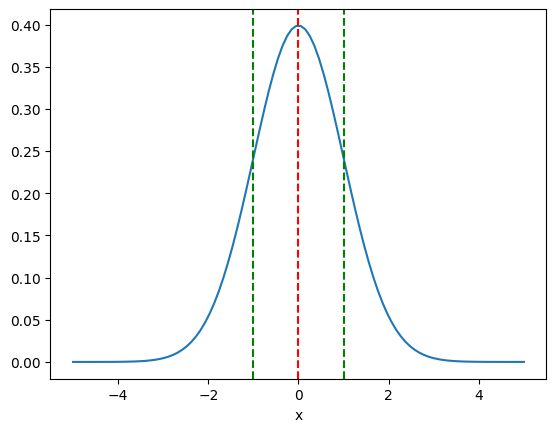

In [ ]:

# Parameters for the normal distribution
mean = 0  # Mean (μ)
variance = 1  # Variance (σ^2)

# Generate data points for x-axis
x = np.linspace(-5, 5, 100)

# Calculate the corresponding y-values using the normal distribution formula
y = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

# Plot the normal distribution
plt.plot(x, y, label='Normal Distribution')

# Mark the mean and variance
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(mean + np.sqrt(variance), color='g', linestyle='--', label='Standard Deviation')
plt.axvline(mean - np.sqrt(variance), color='g', linestyle='--')

# Add labels and legend
plt.xlabel('x')
plt


## Vector Analysis
***

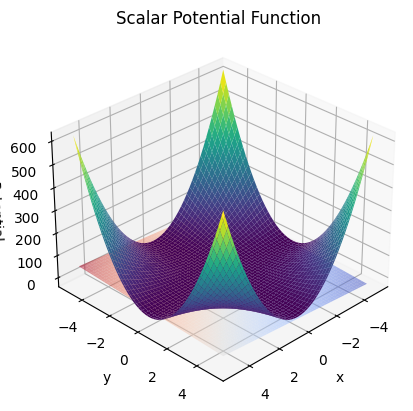

In [ ]:

def potential(x, y):
    return -x**2 * -y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = potential(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')

tangent_plane = lambda x, y: 4 * x - 4 * y + 12

Z_tangent = tangent_plane(X, Y)

ax.plot_surface(X, Y, Z_tangent, alpha=0.5, cmap='coolwarm')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
ax.set_title('Scalar Potential Function')

ax.view_init(elev=30, azim=45)

plt.show()


# Support Vector Machines
***

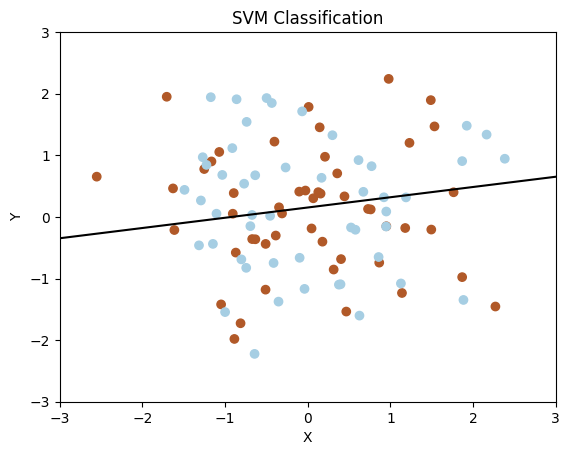

In [ ]:

np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = np.concatenate([np.ones((n_samples // 2,)), -np.ones((n_samples // 2,))])

model = svm.SVC(kernel='linear')
model.fit(X, y)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 3)
yy = a * xx - (model.intercept_[0]) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, 'k-')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM Classification')

# Show the plot
plt.show()


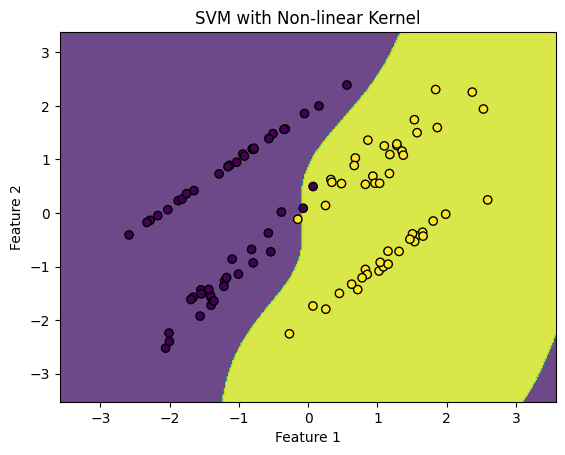

In [ ]:


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Non-linear Kernel')
plt.show()



In [ ]:

categories = ['sci.space', 'rec.sport.baseball', 'talk.politics.guns']
data = fetch_20newsgroups(categories=categories, subset='all', shuffle=True, random_state=42)
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

svm = SVC(kernel='linear')
svm.fit(X_train_vectors, y_train)

y_pred = svm.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9948186528497409
Classification Report:
                    precision    recall  f1-score   support

rec.sport.baseball       1.00      1.00      1.00       205
         sci.space       0.99      0.99      0.99       194
talk.politics.guns       0.99      0.99      0.99       180

          accuracy                           0.99       579
         macro avg       0.99      0.99      0.99       579
      weighted avg       0.99      0.99      0.99       579



# Neural Networks
***

In [3]:

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

# Define hyperparameters
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 2
learning_rate = 0.001
num_epochs = 10

# Load the sample dataset (CIFAR-10)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
train_dataset.targets = [1 if target == 3 else 0 for target in train_dataset.targets]  # Assign label 1 to cat images, 0 to others
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)
test_dataset.targets = [1 if target == 3 else 0 for target in test_dataset.targets]  # Assign label 1 to cat images, 0 to others
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Initialize the model
model = Net(input_size, hidden_size, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 32 * 32 * 3)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 32 * 32 * 3)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print('Test Accuracy: {:.2f}%'.format(accuracy))


52.4%

#  Latent Semantic Analysis:
***

At first, for our data collection, the following code lets us to fetch the 20 Newsgroups dataset and splits it into training and test subsets. The training subset consists of ‘X_train’ documents and their corresponding ‘y_train’ Labels.

In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True)

After this, we need to clean the data extracted in order to find the most important features in the particular data cluster. Cleaning and Preprocessing of information extracted is the most important step in order to increase the efficiency of LSA. The following code helps us to remove unwanted website URLs, numbers and emails from the dataset 20Newsgroups.

In [ ]:

nltk.download('stopwords')

tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += ['__', '___']

# Uncomment and run the 3 lines below if you haven't got these packages already
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def rmv_emails_websites(string):
    new_str = re.sub(r"\S+@\S+", '', string)
    new_str = re.sub(r"\S+.co\S+", '', new_str)
    new_str = re.sub(r"\S+.ed\S+", '', new_str)
    new_str = re.sub(r"[0-9]+", '', new_str)
    return new_str

X_train = list(map(rmv_emails_websites, X_train))
X_test = list(map(rmv_emails_websites, X_test))


Since the models built-in works only on numbers but not on strings, the following code converts the documents into smaller observation entities like words by tokenizing them and turn them into numbers using sklearn’s TF-IDF vectorizer.

That can be done by importing TfidfVectoriser from sklearn.feature_extraction.text. Since our dataset directly contain the   information in smaller words, there is no need for that part to be done here.

Then the following code visualizes and Exploratory Data Analysis (EDA) of our decomposed data by fitting our LSA object to our train data and specify only 20 components.

In [ ]:

tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=tokenizer.tokenize, 
                        max_df=0.2,
                        min_df=0.02
                       )
tfidf_train_sparse = tfidf.fit_transform(X_train)
feature_names = tfidf.get_feature_names_out()

tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), columns=feature_names)

# Rest of the code

lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T
sns.barplot(x=list(range(len(Sigma))), y=Sigma)

Then we need to slice the term topic matrix into Pandas series (single column data frames), sort them by value and plot them. And we need to understand the importance of LSA in finding patterns of unlabelled data, we compare our accuracy on LSA data with the accuracy on our standard TF-IDF data using the following code

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg_lsa = LogisticRegression(solver='lbfgs')
logreg = LogisticRegression(solver='lbfgs')

logreg_param_grid = [{'penalty': ['l2']},
                     {'tol': [0.0001, 0.0005, 0.001]}]

grid_lsa_log = GridSearchCV(estimator=logreg_lsa,
                            param_grid=logreg_param_grid, 
                            scoring='accuracy', cv=5,
                            n_jobs=-1)

grid_log = GridSearchCV(estimator=logreg,
                        param_grid=logreg_param_grid, 
                        scoring='accuracy', cv=5,
                        n_jobs=-1)

best_lsa_logreg = grid_lsa_log.fit(tfidf_lsa_data, y_train).best_estimator_
best_reg_logreg = grid_log.fit(tfidf_train_df, y_train).best_estimator_

print("Accuracy of Logistic Regression on LSA train data is:", best_lsa_logreg.score(tfidf_lsa_data, y_train))
print("Accuracy of Logistic Regression with standard train data is:", best_reg_logreg.score(tfidf_train_df, y_train))

#### Hence Our LSA model is able to capture about as much information from the test data as our standard model did with less than Half the dimensions.

# Principal Components Analysis
***

The following python code generates 2-Dimensional dataset “X” and plots it as a scatter plot. It can be used as a visual representation of data before applying PCA or other Dimensionality reduction techniques.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

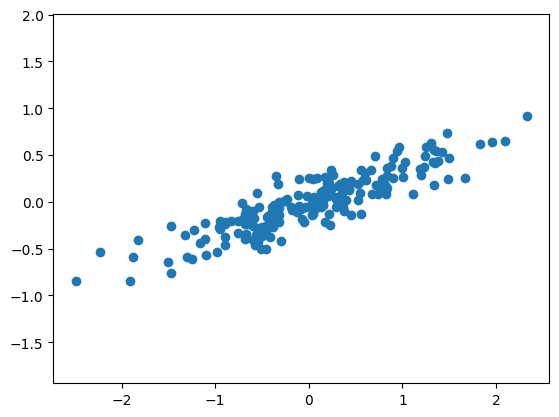

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

From the above plot we can observe that Most of the Variance is along the axes.

In the following code, first 4 lines perform PCA on dataset “X” using scikit-learn’s PCA module. It calculates the principal components and prints them. The principal components represent the directions of original feature space along which the data varies the most. The following lines visualizes the principal components calculated by PCA. It overlays the original scatter plot with lines representing principal components, where the length and orientation of the lines indicate the explained variance captured by each component. The visualisation helps in understanding how the principal components align with the data distribution and their relative importance.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363483,
 1.0052301483776815)

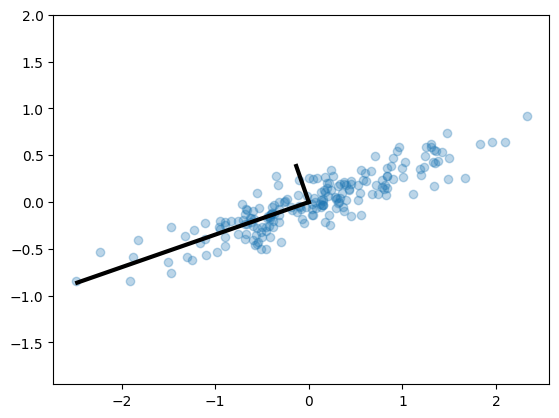

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')

In [ ]:
import numpy as np

def calculate_eigen(X):
    # Mean center the data matrix
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    return eigenvalues, eigenvectors

def calculate_principal_components(X, k):
    # Mean center the data matrix
    X_centered = X - np.mean(X, axis=0)

    # Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues in descending order and select top k
    top_k_indices = np.argsort(eigenvalues)[::-1][:k]
    top_k_eigenvectors = eigenvectors[:, top_k_indices]

    # Project the centered data onto the top k eigenvectors
    principal_components = np.dot(X_centered, top_k_eigenvectors)

    return principal_components

The following code applies the dimensionality reduction transformation to the dataset “X” using the fitted PCA model. It then prints the shapes of original datasets and transformed dataset to provide information about the dimensions before and after the transformation.

In [ ]:
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 2)


(-2.7292712056271973,
 2.570274439335262,
 -0.9326181575178755,
 1.0044138302291832)

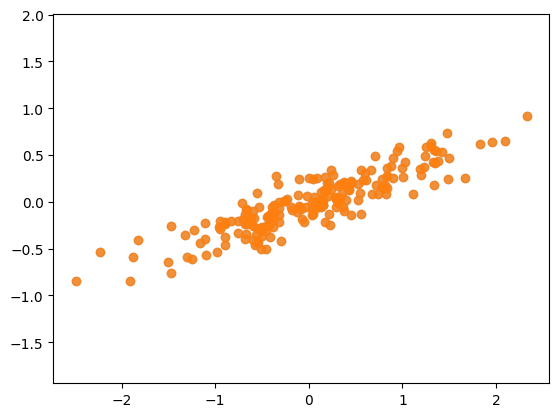

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

# Linear Regression:
***

Let us have a look at the linear regression using Gradient descent algorithm
\
In machine learning, linear regression is a popular technique used for predicting numerical values based on input features. It models the relationship between a dependent variable (also known as the target or output variable) and one or more independent variables (also known as input or predictor variables) using a linear equation.
\
In linear regression, the dependent variable is modeled as a linear combination of the independent variables. The model can be represented as:
\
Y = β0 + β1 X1 + β2 X2 + . . . + βn Xn + ϵ
where Y is the dependent variable, X1 , X2 , . . . , Xn are the independent variables, β0 , β1 , β2 , . . . , βn are the coefficients to be estimated, and ϵ represents the error term.


## The Gradient Descendant Algorithm:
#### Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.
#### Let Y be the linearly dependent variable and X be the Linearly independent variable, then we will define the linear relationships between the variables by predicting the values of m and c as follows:
#### Y = mX+c.
#### gradient descendent algorithm helps us to minimise the error in our predicted value of m and c.

#### The following code will generate the random data points with a linear relationship, trains a linear regression model on the data, and visualizes the data points along with the predicted regression line. It serves as a simple demonstration of linear regression with one input variable.
### Note that following code is applicable for linear regression in only one input variable Like y=mx+c.

In [ ]:

data =np.random.rand(100,2)
data[:,1] = data[:,0]*10 + 1 + np.random.randn(100)
X = data[:,0]
y = data[:,1]

import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))

plt.scatter(X,y)
plt.plot(X,model.predict(X.reshape(-1,1)),color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### For implementing the model which can be applicable to Linear regression with more than 1 input variable,
#### The following code reads data from data.csv file, separates the input features and the target variable, and then creates a scatter plot to visualize the relationship between the two variables

In [ ]:

plt.rcParams['figure.figsize'] = (8.0, 7.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#### The following code applies the gradient descent algorithm to optimize the values of the slope and y-intercept of a linear regression line in order to minimize the difference between the predicted values (Y_pred) and the actual target values (Y) based on the input variable (X).

In [ ]:
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

NameError: name 'X' is not defined

#### The following code makes predictions using the linear regression model by multiplying the input variable (X) by the slope (m) and adding the y-intercept (c). It then visualizes the original data points (X, Y) as a scatter plot and overlays the regression line, providing a visual representation of how well the linear regression model fits the data.

In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

NameError: name 'm' is not defined